# Electron transport in graphene

In [1]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

C:\Users\Marcin\anaconda3\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [2]:
sf = 16
a0 = 0.25*sf
sin_30 = np . sin (30* np.pi /180)
cos_30 = np . cos (30* np.pi /180)

In [3]:
graphene = kwant.lattice.general([(0, a0), (cos_30*a0, sin_30*a0)], [(0, 0), (a0/np.sqrt(3), 0) ], norbs =1)
a, b = graphene.sublattices

In [4]:
t=-3.0/sf 
W=12.9 
L=15
pot=0.1
W2=12.9

In [5]:
def rect(pos):
    x,y = pos
    return -L<x<L and -W<y<W
    
def potential(site):
    (x,y) = site.pos
    d = y*cos_30 + x*sin_30
    return pot*np.tanh(d/W)
    
sys = kwant.Builder()
sys [graphene.shape(rect, (0, 0))] = potential

In [6]:
def nn_hopping(site1, site2):
    (x1, y1) = site1.pos
    (x2, y2) = site2.pos
    return t

hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = nn_hopping

In [7]:
def lead_shape(pos):
    x, y = pos
    return -W2 < y < W2

sym0 = kwant.TranslationalSymmetry([-np.sqrt(3)*a0, 0])
lead0 = kwant.Builder(sym0)
lead0[graphene.shape(lead_shape, (0 , 0))] = potential
lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = nn_hopping


sym1 = kwant.TranslationalSymmetry([np.sqrt(3)*a0, 0])
lead1 = kwant.Builder(sym1)
lead1[graphene.shape(lead_shape, (0, 0))] = 0.0
lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = nn_hopping

for lead in [lead0, lead1]:
        sys.attach_lead(lead)

In [8]:
def si_color(site):
    return potential(site)

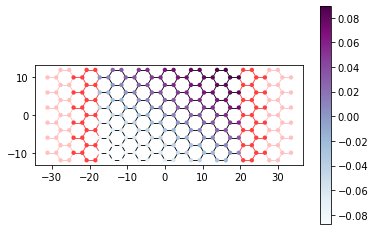

In [9]:
kwant.plot(sys, site_color=si_color, cmap='BuPu')
sys = sys.finalized()

In [10]:
def transmission(E):
    smatrix=kwant.smatrix(sys,E)
    t=smatrix.transmission(1,0)
    return t

In [11]:
def plot_bandstructure(flead, momenta):
    bands = kwant.physics.Bands(flead)
    energies = [bands(k) for k in momenta]

    plt.figure()
    plt.plot(momenta/sf/np.sqrt(3), energies)
    plt.xlabel(r"k (nm$^{-1}$)")
    plt.ylabel("energy [t]")
    plt.ylim(-0.2, 0.2)
    #plt.savefig(file, bbox_inches='tight', transparent=True)
    plt.show()

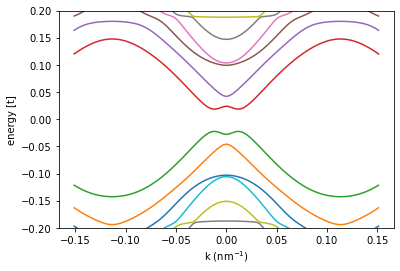

In [12]:
momenta = np.linspace(-np.pi/3/4*sf, np.pi/3/4*sf, 101)
plot_bandstructure(sys.leads[0], momenta)

In [13]:
for E in np.arange(-0.2, 0.2, 0.01):
    print(transmission(E))

2.9328568696349726
3.338353762358683
2.571541885498551
2.303805098390595
1.9774155875592334
2.0881768059713837
1.7814263256404166
2.362128813220603
2.3019934754732714
1.961982483866749
0.8813265211060772
1.2232834531234371
1.779899955995035
1.5231155010130675
1.199126587094378
0.8411877484800867
0.5715649269691783
0.3603952543657556
0.0
0.0
0.0
0.0
0.0
0.7210666105640435
0.6628196999814395
1.3471709030219787
1.7187930725773914
1.8083156034199181
1.5865835403224173
1.4861660841521813
1.9493779741789008
1.9836890295477796
2.3843465988338126
2.5689918440520283
2.5523768367796373
2.5814303203580047
2.1263247015154305
3.1181010057568117
2.5903446883929075
3.000459491331033


In [14]:
def conductance(Emax, ne):
    energies=np.linspace(0,Emax,ne)
    cond=[transmission(E) for E in energies]
    return energies, cond

In [15]:
conductance(0.2, 20)

(array([0.        , 0.01052632, 0.02105263, 0.03157895, 0.04210526,
        0.05263158, 0.06315789, 0.07368421, 0.08421053, 0.09473684,
        0.10526316, 0.11578947, 0.12631579, 0.13684211, 0.14736842,
        0.15789474, 0.16842105, 0.17894737, 0.18947368, 0.2       ]),
 [0.0,
  0.0,
  0.0,
  0.7794513860656327,
  0.26709672119849387,
  1.4861507032771657,
  1.7734922855001993,
  1.7774246752798535,
  1.2014340951805118,
  1.8914706023172005,
  1.890776262935473,
  2.1804589079711265,
  2.590312980787936,
  2.2848551797705894,
  2.635296507220314,
  2.0610039225515666,
  3.0811945897343125,
  2.6900848147817205,
  2.9438324645216465,
  2.867129663576414])

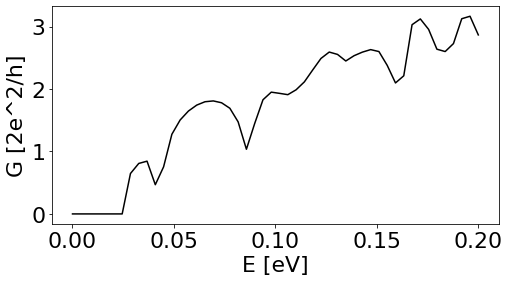

In [16]:
energies, cond=conductance(0.2,50)
plt.figure(figsize=(8,4))
plt.plot(energies, cond,'k-')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel("E [eV]",fontsize=22)
plt.ylabel("G [2e^2/h]",fontsize=22)
plt.show()